In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Bookings_Filtered.csv")

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49135,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49136,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49137,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49138,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


## Dealing with Categorical Variables

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_and_drop(df, column_name, prefix):
    # Create instance of one hot encoder
    encoder = OneHotEncoder(handle_unknown='ignore')
    
    # One hot encode the specified column
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[column_name]]).toarray())
    
    # Rename the columns
    encoder_df = encoder_df.add_prefix(prefix)
    
    # Join the encoded DataFrame with the original DataFrame
    df_final = df.join(encoder_df)
    
    # Drop the original categorical column
    df_final.drop(column_name, axis=1, inplace=True)
    
    return df_final

# Assuming df is your DataFrame containing the data

# Encode 'sales_channel' column
df_final = encode_and_drop(df, 'sales_channel', 'sales_channel_')

# Encode 'trip_type' column
df_final = encode_and_drop(df_final, 'trip_type', 'trip_type_')

# Drop other categorical columns
df_final.drop(['booking_origin', 'route'], axis=1, inplace=True)

# Rename the columns to match the provided names
df_final.rename(columns={'trip_type_0': 'one_way_trip',
                          'trip_type_1': 'round_trip',
                          'trip_type_2': 'circle_trip',
                          'sales_channel_0': 'internet_channel',
                          'sales_channel_1': 'mobile_channel'}, inplace=True)

# Store the label for supervised learning
label = df['booking_complete']

# Drop the 'booking_complete' column
df_final.drop('booking_complete', axis=1, inplace=True)

In [15]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet_channel,mobile_channel,one_way_trip,round_trip,circle_trip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49135,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49136,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49137,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49138,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


## Normalizing the Values

Why normalizing values is beneficial in machine learning:

1. **Enhanced Convergence**: Normalizing features aids faster convergence in gradient-based optimization algorithms.

2. **Improved Performance**: Some algorithms perform better when features are scaled similarly, avoiding dominance by features with larger scales.

3. **Interpretability**: Normalized features are easier to interpret, facilitating comparison of coefficients or feature importances.

4. **Reduced Complexity**: Normalization can reduce computational complexity, leading to faster training times.

5. **Robustness to Outliers**: Normalization can make models more robust to outliers by mitigating the impact of extreme values.

In [19]:
#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [20]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [21]:
scaled_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet_channel,mobile_channel,one_way_trip,round_trip,circle_trip,label
0,0.411676,2.255695,-0.123922,-0.381012,1.103215,0.699963,-0.651483,-0.866889,-1.17167,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
1,-0.574613,0.401313,-0.093092,-1.121721,1.103215,-1.428646,-0.651483,-0.866889,-1.17167,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
2,0.411676,2.020806,-0.031434,1.470762,-0.408581,0.699963,1.534959,-0.866889,-1.17167,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
3,-0.574613,0.203513,0.246031,-0.936544,1.103215,-1.428646,-0.651483,1.153550,-1.17167,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
4,0.411676,-0.142638,-0.031434,1.100407,-0.408581,0.699963,-0.651483,1.153550,-1.17167,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0


## Correlation matrix

<Axes: >

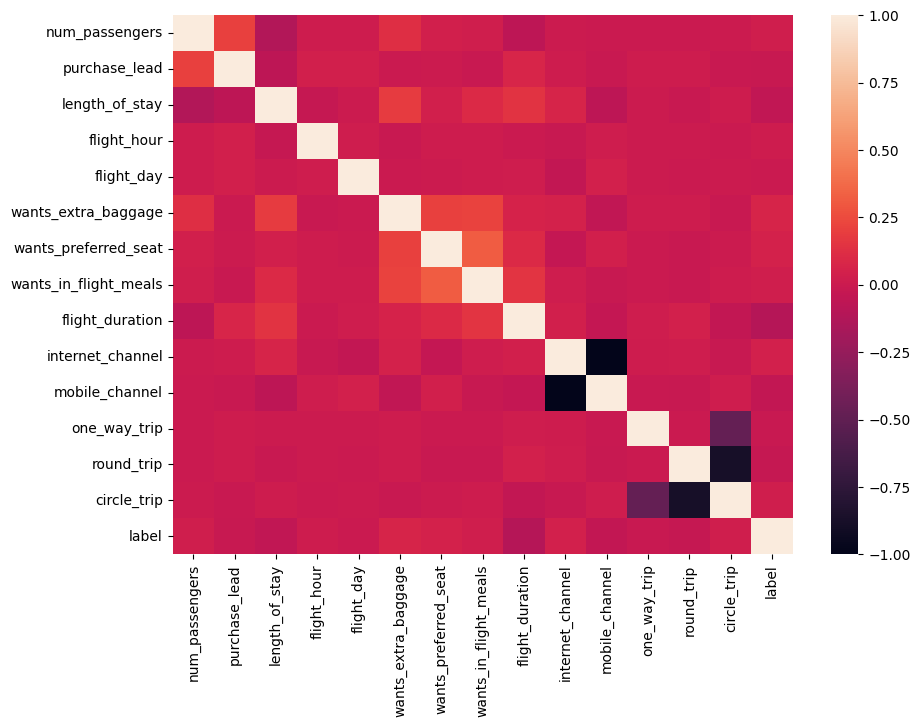

In [22]:
corr = scaled_df.corr()
plt.figure(figsize=(10,7))
#plot the heatmap
sns.heatmap(corr)

## Spliting the Dataset for Training and Testing purposes

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.inspection import permutation_importance
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Splitting the data into training and testing sets
X = scaled_df.iloc[:,:-1]
y = scaled_df['label']
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

# Function to fit and predict using a model
def model_fit_predict(model, X_train, y_train, X_predict):
    model.fit(X_train, y_train)
    return model.predict(X_predict)

# Evaluation metrics
def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)


## Random Forest Classifier

In [36]:
# Create an instance of the RandomForestClassifier with specified parameters
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

## Training Accuracy Check

In [37]:
# Predict labels for the training data using the trained model
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)

# Calculate unique predicted labels
unique_predicted_labels_train = set(y_pred_train)

# Calculate F1 score for training data
f1_train = round(f1_score(y_train, y_pred_train), 2)

# Calculate accuracy score for training data
acc_train = round(accuracy_score(y_train, y_pred_train), 2)

# Calculate precision score for training data
pre_train = round(precision_score(y_train, y_pred_train), 2)

# Print accuracy, precision, and F1-score for training data
print(f"Accuracy, precision, and F1-score for training data are {acc_train}, {pre_train}, and {f1_train} respectively")

Accuracy, precision, and F1-score for training data are 0.94, 1.0, and 0.72 respectively


0.9353632478632479

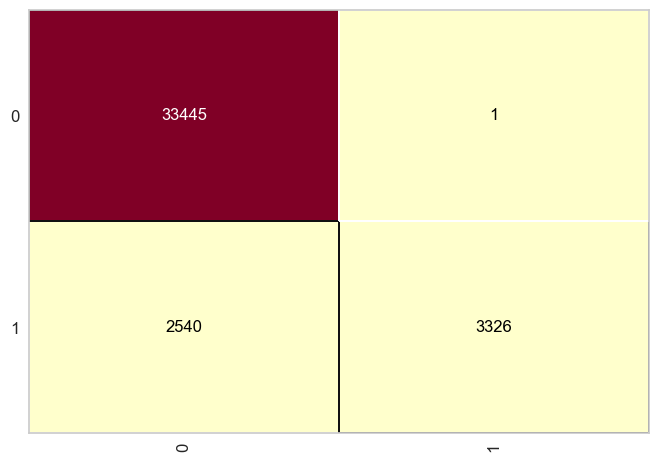

In [38]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

## Testing Accuracy Test

In [51]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for testing data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for testing data are 0.63, 0.61 and 0.6 respectively


0.8490028490028491

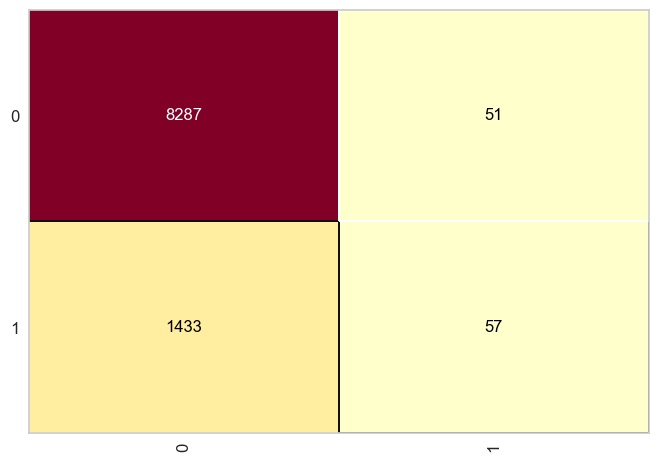

In [40]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

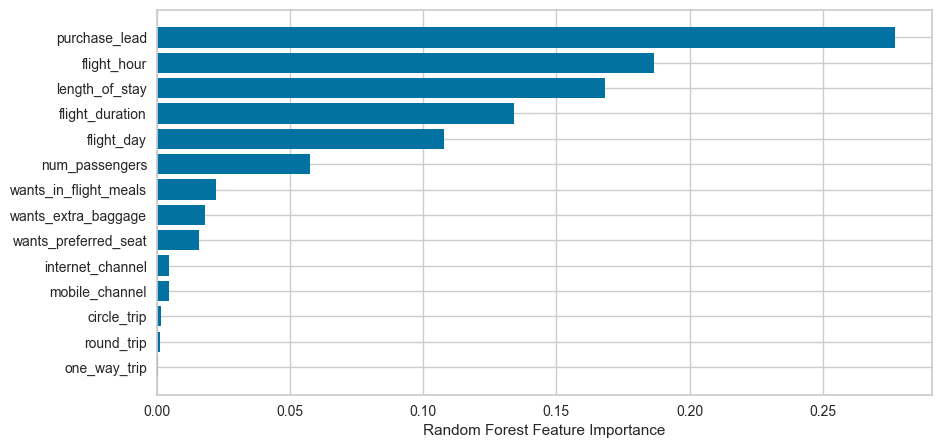

In [41]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In the first scenario, the model exhibits high accuracy and precision, indicating its proficiency in making accurate predictions and minimizing false positives. Moreover, the F1-score is also notably high, indicating a commendable balance between precision and recall.

Conversely, in the second scenario, despite maintaining a relatively high accuracy, both precision and F1-score witness a significant decline compared to the first scenario. This discrepancy suggests a higher frequency of false positive predictions by the model, leading to reduced precision. Additionally, the diminished F1-score reflects the model's subpar performance in terms of both precision and recall.

To summarize, while accuracy offers a broad perspective on the model's performance, precision and F1-score offer additional insights into its ability to correctly predict positive outcomes and maintain a balance between precision and recall, respectively. A significant factor contributing to a low F1-score could be an imbalanced dataset, where the number of entries classified as 0 outweighs those classified as 1. To address this issue, we could consider reducing the number of entries classified as 0 to equalize them with the number of entries classified as 1.

## Balancing the Dataset

In [42]:
scaled_df.label.value_counts()

label
0    41784
1     7356
Name: count, dtype: int64

In [43]:
#create a dataframe having all labels 0 with 8000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [44]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [45]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [46]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,internet_channel,mobile_channel,one_way_trip,round_trip,circle_trip,label
0,0.411676,0.327138,-0.031434,0.359698,-0.912513,0.699963,1.534959,-0.866889,-0.438006,0.355844,-0.355844,-0.048643,-0.088747,0.101388,1
1,1.397966,2.119707,-0.185581,-0.566189,1.607147,0.699963,1.534959,1.153550,-1.104974,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
2,0.411676,-0.736040,-0.524704,-0.381012,0.095351,0.699963,-0.651483,-0.866889,-1.104974,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
3,0.411676,-0.785491,-0.678851,1.655939,0.095351,-1.428646,1.534959,-0.866889,-0.438006,0.355844,-0.355844,-0.048643,-0.088747,0.101388,1
4,-0.574613,-0.389889,-0.123922,0.174520,0.095351,0.699963,1.534959,1.153550,1.035992,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15351,-0.574613,-0.933841,1.571696,-0.751366,0.095351,0.699963,-0.651483,-0.866889,-1.685235,0.355844,-0.355844,-0.048643,-0.088747,0.101388,1
15352,-0.574613,-0.624778,-0.586363,0.359698,0.599283,-1.428646,-0.651483,-0.866889,-0.184559,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0
15353,-0.574613,0.735102,-0.586363,-1.306899,0.599283,0.699963,-0.651483,-0.866889,-0.438006,0.355844,-0.355844,-0.048643,-0.088747,0.101388,1
15354,-0.574613,0.092250,-0.555534,-0.010657,-0.912513,-1.428646,-0.651483,-0.866889,-1.738593,0.355844,-0.355844,-0.048643,-0.088747,0.101388,0


In [48]:
from sklearn.metrics import recall_score

X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.62, 0.6, 0.59, 0.65 and 0.6 respectively


0.6236979166666666

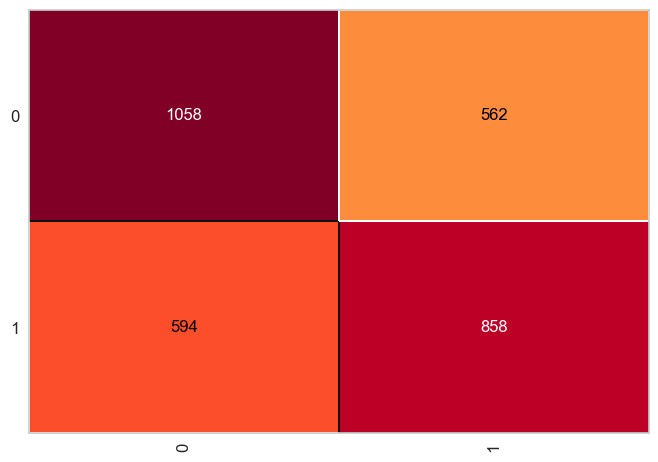

In [49]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

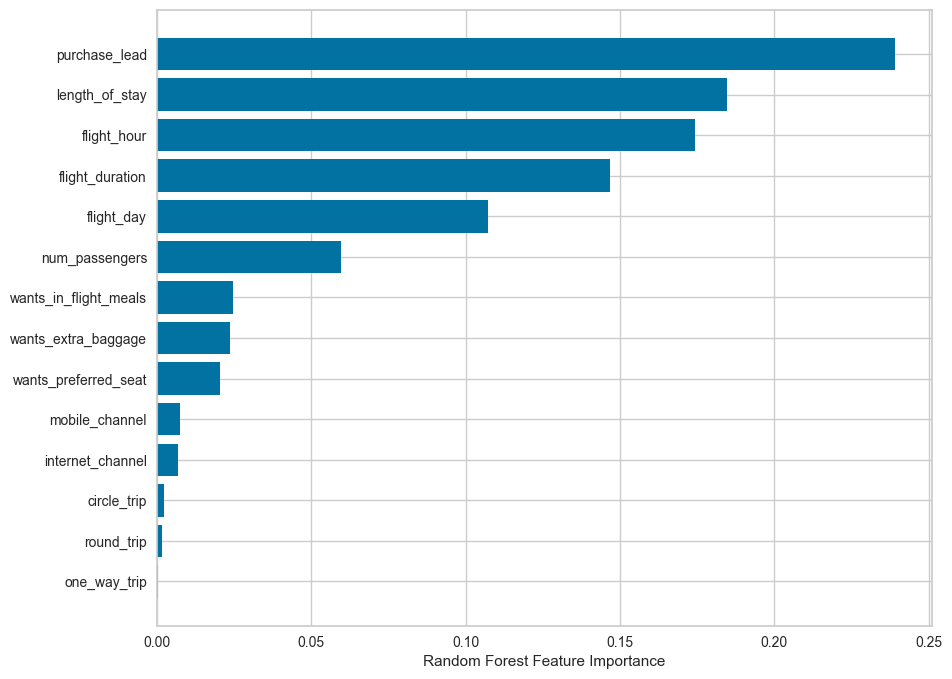

In [50]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")